<a href="https://colab.research.google.com/github/Pavan-Aditya-Kumar-Gorrela/DTvsRFvsXG/blob/main/DTvsRFvsXG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.5 MB/s eta 0:00:00


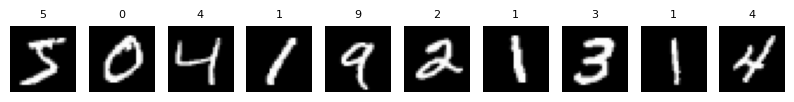

In [7]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mnist = fetch_openml('mnist_784' , version=1 ,as_frame=False)
X,y = mnist["data"],mnist["target"].astype(int)

fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
    ax.set_title(str(y[i]), fontsize=8)
plt.show()

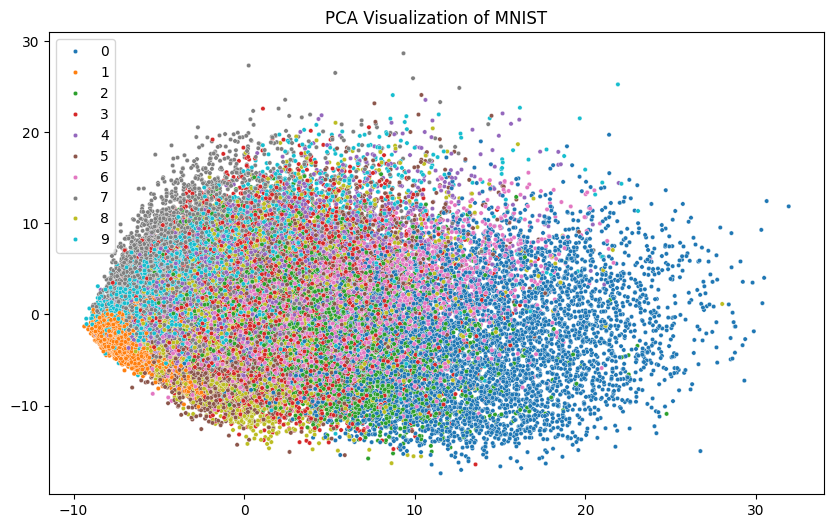

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', legend='full', s=10)
plt.title("PCA Visualization of MNIST")
plt.show()

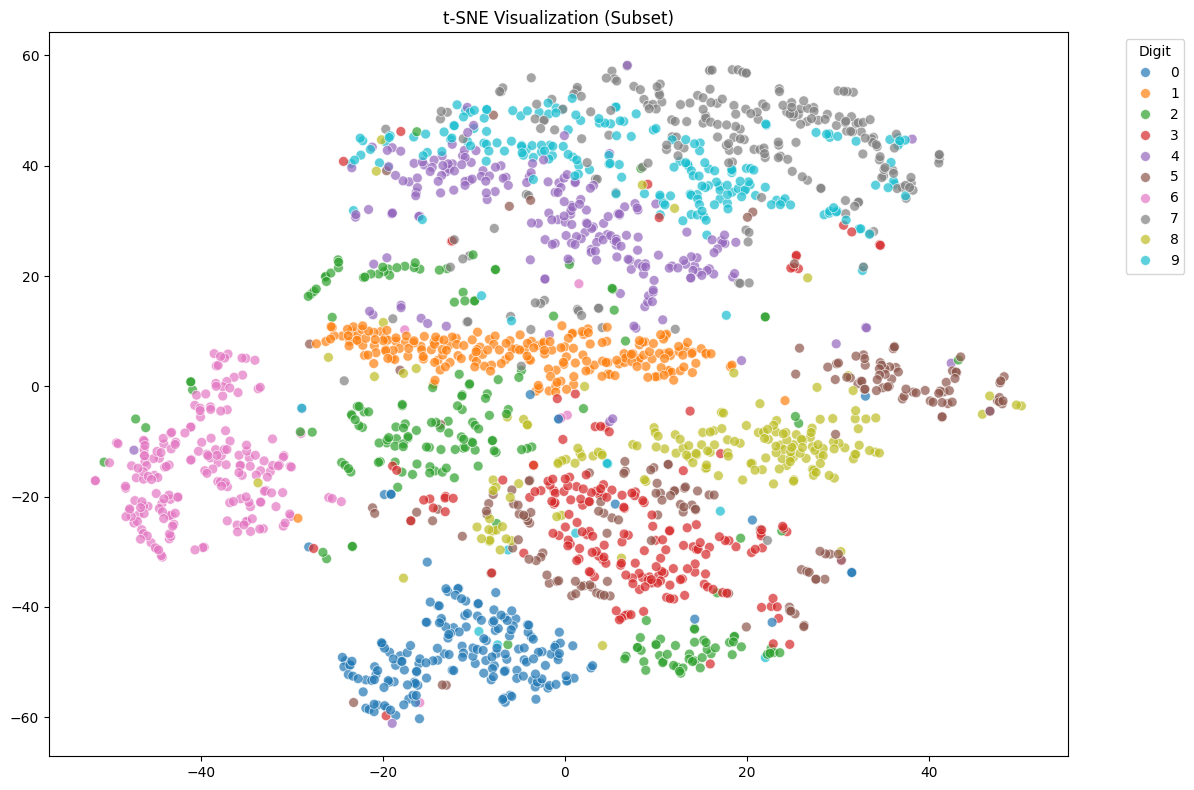

In [33]:
from sklearn.manifold import TSNE

X_subset = X[:2000]
y_subset = y[:2000]
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_subset)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE Visualization (Subset)")
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.8792857142857143
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1343
           1       0.95      0.97      0.96      1600
           2       0.86      0.87      0.86      1380
           3       0.84      0.85      0.84      1433
           4       0.85      0.87      0.86      1295
           5       0.84      0.83      0.83      1273
           6       0.91      0.90      0.91      1396
           7       0.91      0.90      0.91      1503
           8       0.84      0.82      0.83      1357
           9       0.85      0.85      0.85      1420

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



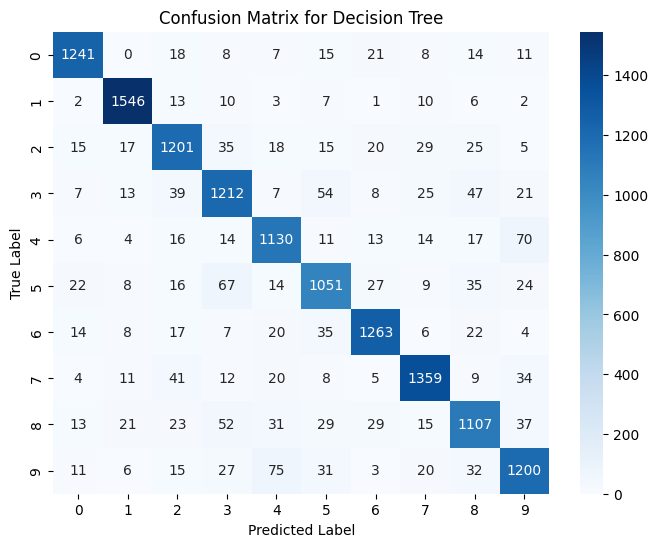

In [22]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

dt = DecisionTreeClassifier(criterion='entropy' , max_depth=20, min_samples_split=5 , random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Decision Tree')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 10 classes (digits 0-9)
plot_confusion_matrix(y_test, dt_preds, classes=np.arange(10))

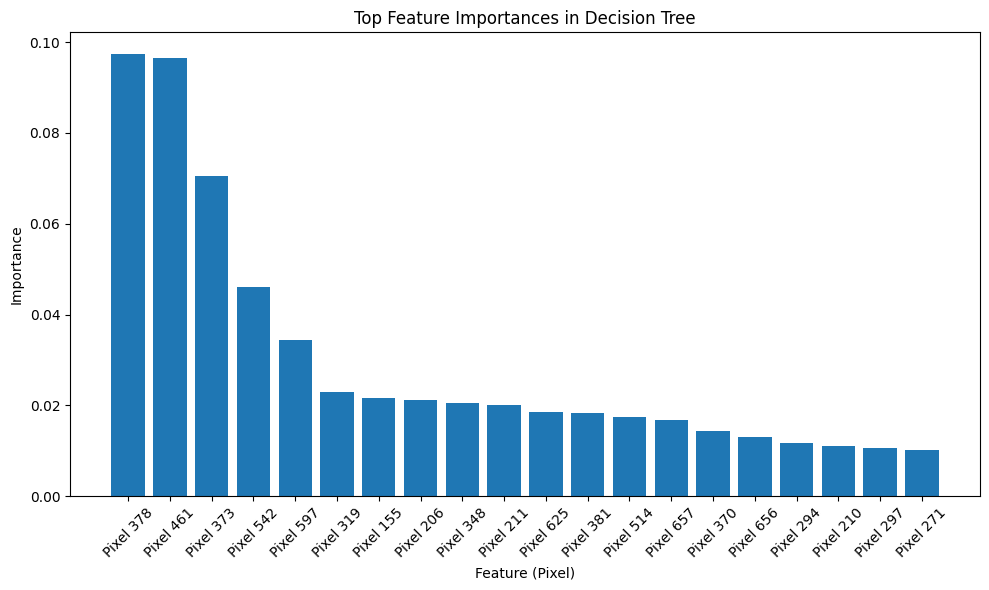

In [12]:
# Feature Importance Plot
def plot_feature_importance(model, feature_count):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(feature_count), importances[indices[:feature_count]], align='center')
    plt.xticks(range(feature_count), [f'Pixel {i}' for i in indices[:feature_count]], rotation=45)
    plt.title('Top Feature Importances in Decision Tree')
    plt.xlabel('Feature (Pixel)')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

# Plot top 20 features (pixels) for clarity
plot_feature_importance(dt, feature_count=20)

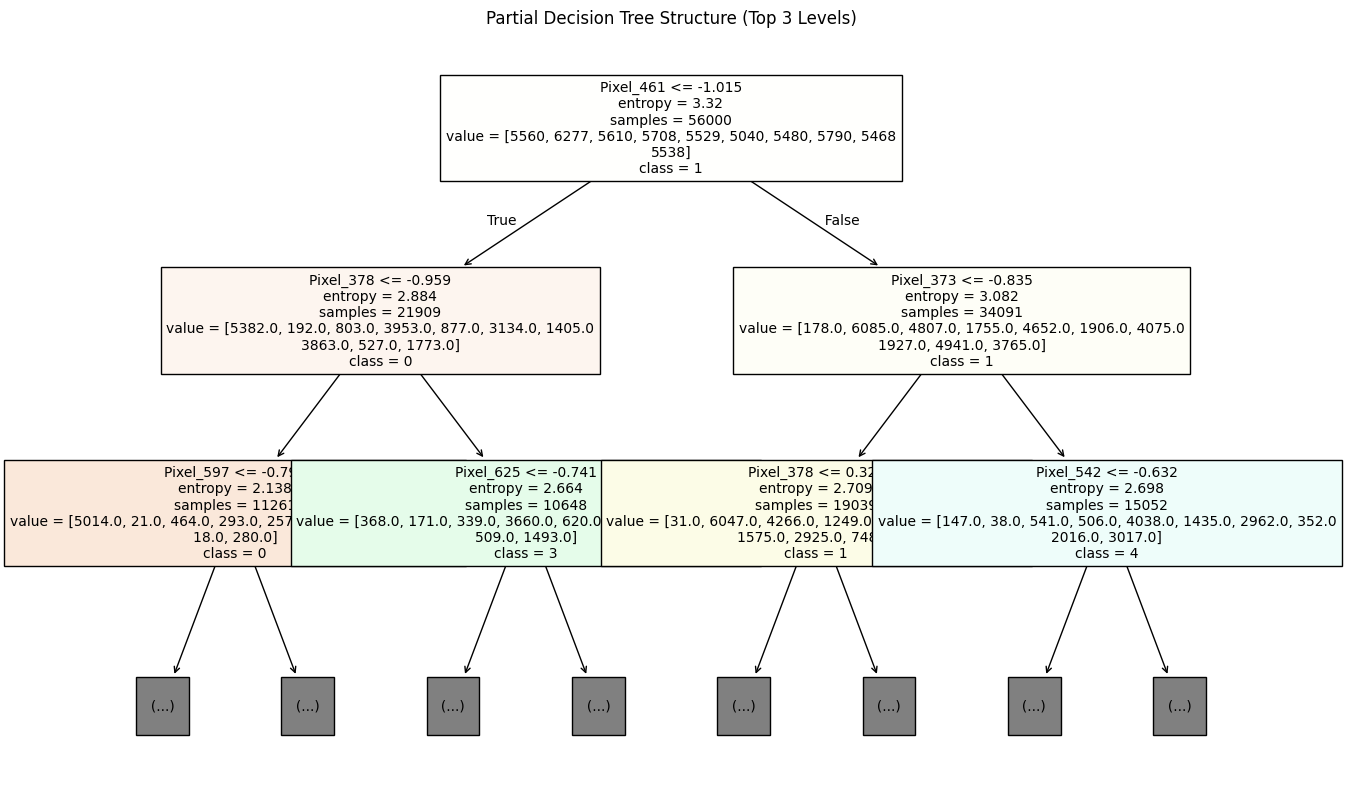

In [13]:
# Partial Decision Tree Visualization
def plot_partial_decision_tree(model, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(model,
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              max_depth=2,
              fontsize=10)
    plt.title('Partial Decision Tree Structure (Top 3 Levels)')
    plt.show()

# Feature names (pixels) and class names (digits 0-9)
feature_names = [f'Pixel_{i}' for i in range(X_train.shape[1])]
class_names = [str(i) for i in range(10)]
plot_partial_decision_tree(dt, feature_names, class_names)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5,
                               max_features='sqrt', random_state=42, oob_score=True)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

Random Forest Accuracy: 0.9628571428571429
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.96      0.94      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.94      0.95      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



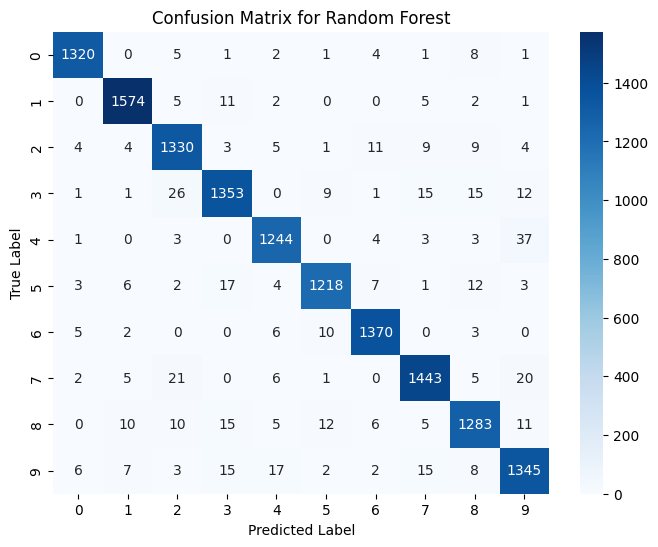

In [16]:
#Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming 10 classes (digits 0-9)
plot_confusion_matrix(y_test, rf.predict(X_test), classes=np.arange(10))

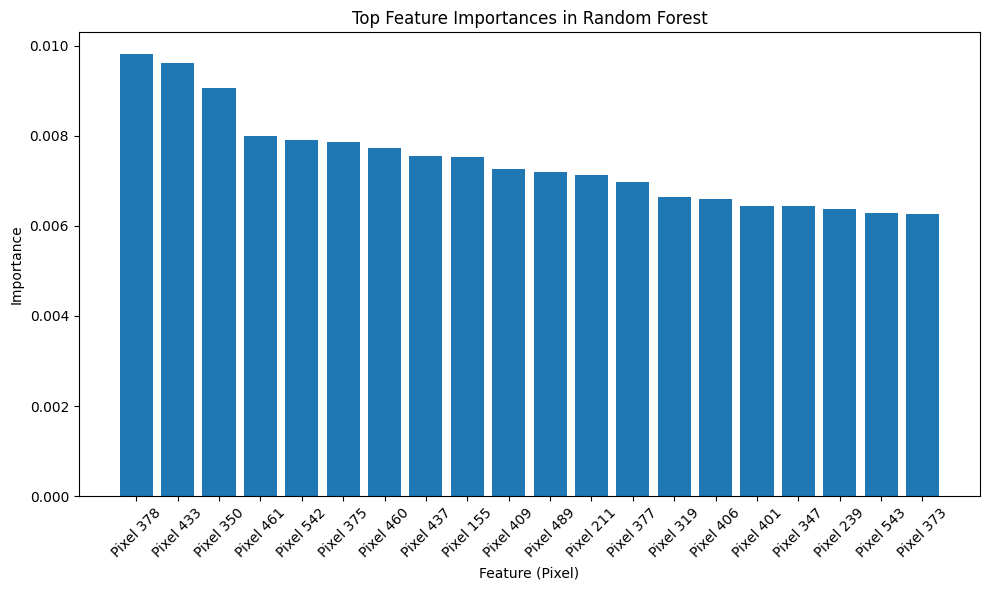

In [28]:
#Feature Importance Plot
def plot_feature_importance(model, feature_count):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort by importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(feature_count), importances[indices[:feature_count]], align='center')
    plt.xticks(range(feature_count), [f'Pixel {i}' for i in indices[:feature_count]], rotation=45)
    plt.title('Top Feature Importances in Random Forest')
    plt.xlabel('Feature (Pixel)')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

# Plot top 20 features (pixels) for clarity
plot_feature_importance(rf, feature_count=20)

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=150, max_depth=10, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8,
                    use_label_encoder=False, eval_metric='mlogloss',
                    random_state=42)
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:22:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9736428571428571


In [24]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.96      0.97      0.97      1295
           5       0.98      0.98      0.98      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



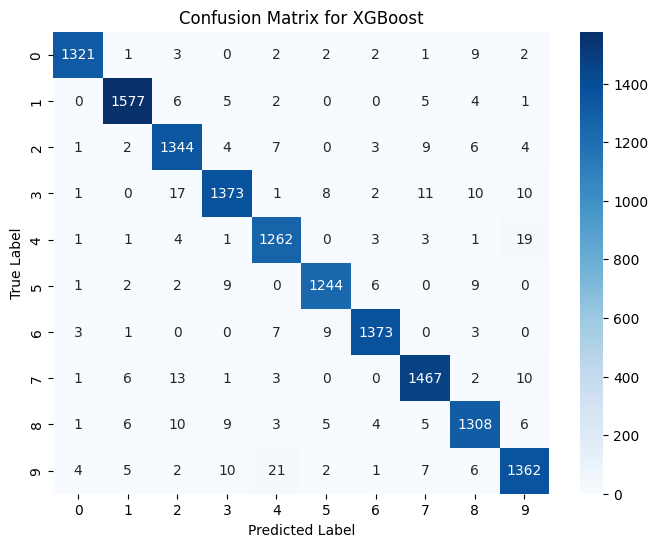

In [25]:
#Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for XGBoost')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#Assuming 10 classes (digits 0-9)
plot_confusion_matrix(y_test, xgb.predict(X_test), classes=np.arange(10))

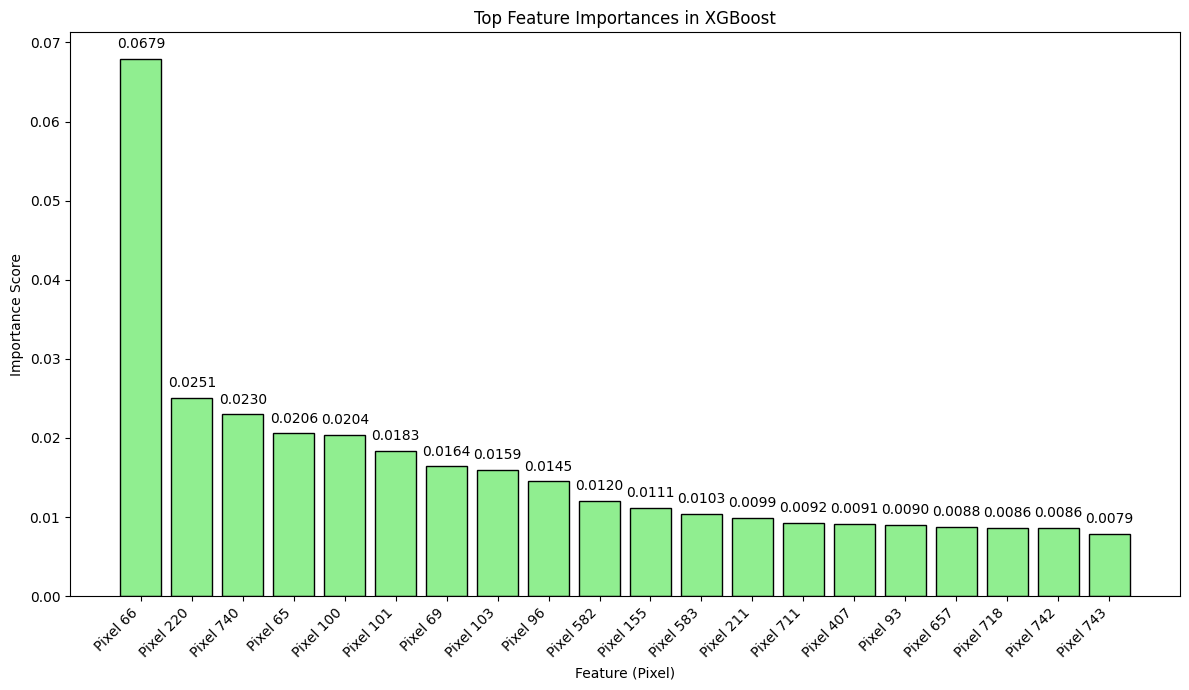

In [26]:
#Feature Importance Plot
def plot_feature_importance(model, feature_count):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort by importance
    plt.figure(figsize=(12, 7))
    bars = plt.bar(range(feature_count), importances[indices[:feature_count]], align='center', color='lightgreen', edgecolor='black')
    for bar, importance in zip(bars, importances[indices[:feature_count]]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{importance:.4f}',
                 ha='center', va='bottom', fontsize=10)
    plt.xticks(range(feature_count), [f'Pixel {i}' for i in indices[:feature_count]], rotation=45, ha='right')
    plt.title('Top Feature Importances in XGBoost')
    plt.xlabel('Feature (Pixel)')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()

# Plot top 20 features (pixels)
plot_feature_importance(xgb, feature_count=20)

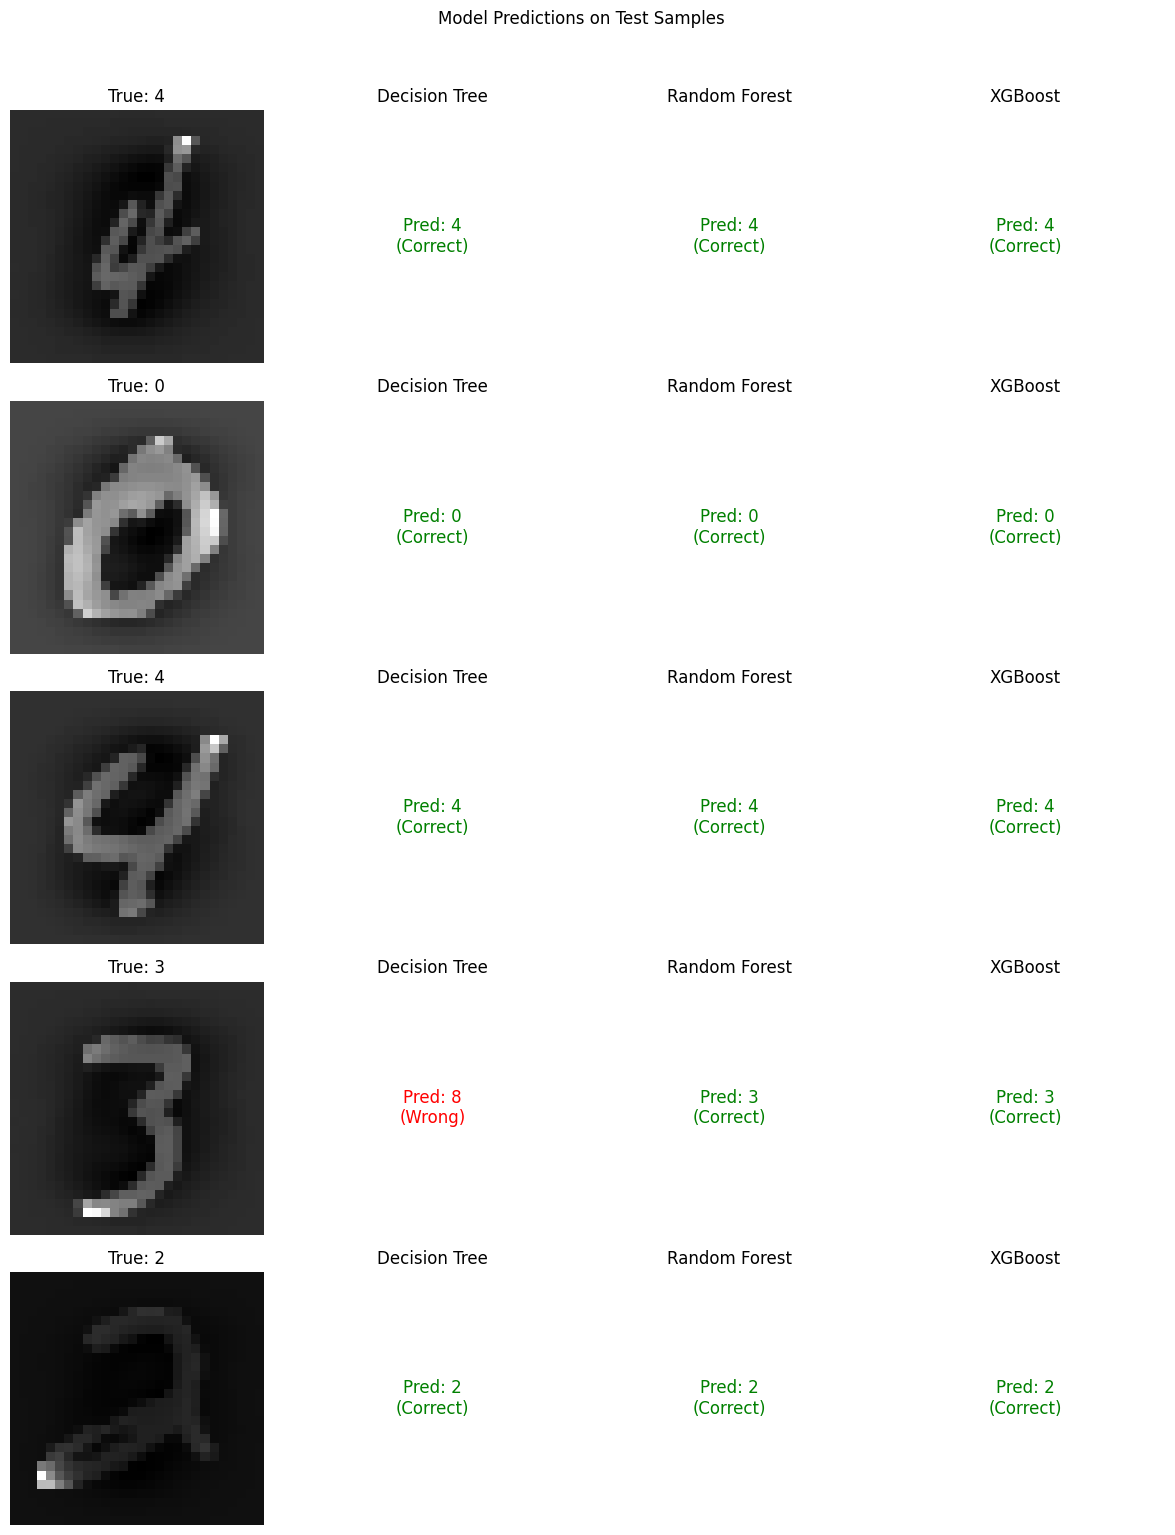

In [37]:
def visualize_predictions(models, model_names, X_test, y_test, num_samples=5):
    # Randomly select test samples
    indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
    X_samples = X_test[indices]
    y_true = y_test[indices]


    predictions = {name: model.predict(X_samples) for name, model in zip(model_names, models)}

    img_size = 8 if X_test.shape[1] == 64 else 28

    fig, axes = plt.subplots(num_samples, len(models) + 1, figsize=(3 * (len(models) + 1), 3 * num_samples))
    for i in range(num_samples):
        axes[i, 0].imshow(X_samples[i].reshape(img_size, img_size), cmap='gray')
        axes[i, 0].set_title(f'True: {y_true[i]}')
        axes[i, 0].axis('off')
        for j, (model_name, preds) in enumerate(predictions.items(), 1):
            pred = preds[i]
            is_correct = pred == y_true[i]
            axes[i, j].text(0.5, 0.5, f'Pred: {pred}\n({"Correct" if is_correct else "Wrong"})',
                            ha='center', va='center', fontsize=12, color='green' if is_correct else 'red')
            axes[i, j].set_title(model_name)
            axes[i, j].axis('off')

    plt.suptitle('Model Predictions on Test Samples', y=1.02)
    plt.tight_layout()
    plt.show()

# Visualize predictions for all models
models = [dt, rf, xgb]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']
visualize_predictions(models, model_names, X_test, y_test, num_samples=5)